<div style="border:solid green 2px; padding: 20px">

<b>Привет, Илья!</b>

Меня зовут Ярослав П. и я буду проверять твой проект. Попробую помочь сделать тебе его еще лучше!

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания или советы.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    
    
### <span style="color:orange">Обратная связь</span><a class="tocSkip">

- Проект отлично выполнен.
- В проекте отличная визуализация и верные выводы по графикам.
- Пожалуйста, поработай над оформлением графиков - это важная часть любого аналитического отчета.
- Также прошу не забывать про общий вывод. Было бы круто рассуждать о причинно-следственной связи полученных результатов.
    
Проект принят, удачи в дальнейшем обучении!

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Введение хорошее.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также было бы здорово добавить название проекта и оглавление.

</div>


# Аналитика

In [29]:
from pyspark import SparkContext
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import HiveContext
import seaborn as sns
import matplotlib as plt

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Я заметил, что нумерация блоков с кодом была не с 1. Советую перед финальной отправкой проекта делать Kernel - Restart and Run All, это позволит проверить тетрадь на работоспособность и избежать лишних ошибок.

</div>

In [30]:
APP_NAME = "DataFrames"
SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME) \
        .config('spark.ui.showConsoleProgress', 'false') \
        .getOrCreate()#Создаю обьект SparkSession 

fly = spark.read.load('/datasets/query_1.csv', 
                       format='csv', header='true', inferSchema='true')#Загружаю датафрейм из csv-файла

In [31]:
print(fly.describe().show())#Вывожу описание данных

+-------+-------------------+------------------+
|summary|              model|    flights_amount|
+-------+-------------------+------------------+
|  count|                  8|                 8|
|   mean|               null|          2035.625|
| stddev|               null|1965.2039470679445|
|    min|    Airbus A319-100|               300|
|    max|Sukhoi SuperJet-100|              4557|
+-------+-------------------+------------------+

None


In [32]:
print(fly.show())#Вывожу данные

+-------------------+--------------+
|              model|flights_amount|
+-------------------+--------------+
|    Airbus A319-100|           607|
|    Airbus A321-200|           960|
|     Boeing 737-300|           630|
|     Boeing 767-300|           600|
|     Boeing 777-300|           300|
| Bombardier CRJ-200|          4446|
| Cessna 208 Caravan|          4557|
|Sukhoi SuperJet-100|          4185|
+-------------------+--------------+

None


In [33]:
print(fly.printSchema())#Вывожу тип данных

root
 |-- model: string (nullable = true)
 |-- flights_amount: integer (nullable = true)

None


In [34]:
fly.toPandas().info()#Вывожу тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int32
dtypes: int32(1), object(1)
memory usage: 224.0+ bytes


Вывод: Таблица query_1.csv прочлась нормально, типы данных соответствуют действительности. Таблица небольшая, состоит из 8-ми строк.

In [35]:
cityes = spark.read.load('/datasets/query_3.csv', 
                       format='csv', header='true', inferSchema='true')
print(cityes.show())

+-------------+------------------+
|         city|   average_flights|
+-------------+------------------+
|       Абакан| 3.870967741935484|
|      Анадырь|               1.0|
|        Анапа| 2.161290322580645|
|  Архангельск| 5.354838709677419|
|    Астрахань|2.4516129032258065|
|      Барнаул|2.6129032258064515|
|     Белгород|               6.0|
|   Белоярский|               2.0|
| Благовещенск|               1.0|
|       Братск|               1.0|
|       Брянск|              10.0|
|     Бугульма|               3.0|
|  Владивосток|               3.0|
|  Владикавказ|               2.0|
|    Волгоград| 5.129032258064516|
|      Воркута| 4.580645161290323|
|      Воронеж|               2.0|
|    Геленджик| 2.590909090909091|
|Горно-Алтайск|1.3870967741935485|
|      Грозный| 1.129032258064516|
+-------------+------------------+
only showing top 20 rows

None


In [36]:
print(cityes.describe().show())

+-------+---------+-----------------+
|summary|     city|  average_flights|
+-------+---------+-----------------+
|  count|      101|              101|
|   mean|     null|5.494189113891766|
| stddev|     null|13.11979040852178|
|    min|   Абакан|              1.0|
|    max|Ярославль|129.7741935483871|
+-------+---------+-----------------+

None


In [37]:
print(cityes.printSchema())

root
 |-- city: string (nullable = true)
 |-- average_flights: double (nullable = true)

None


In [39]:
cityes.toPandas().info()#Вывожу тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Вывод: Таблица query_3.csv прочлась нормально, типы данных соответствуют действительности. Таблица состоит из 101 строчки.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличный первый взгляд на данные.

</div>


In [45]:
(cityes.toPandas()).sort_values('average_flights',ascending=False).head(10)# вывожу топ-10 городов по количеству рейсов
#print(spark.sql("SELECT city, average_flights FROM cityes GROUP BY city, average_flights ORDER BY average_flights DESC;").show(10))

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Все верно. Также этот список можно получить с помощью pandas метода [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html).

</div>


Строю график модели самолётов и количество рейсов.

Text(0, 0.5, 'количество рейсов')

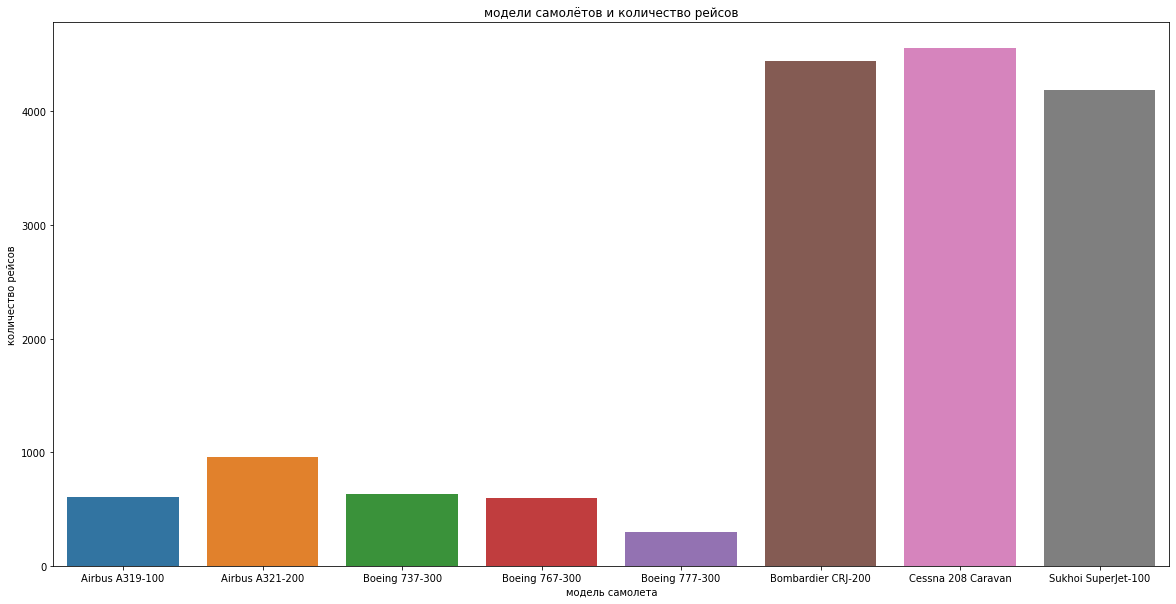

In [46]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x='model', y='flights_amount', data=fly.toPandas())
ax.set_title('модели самолётов и количество рейсов')
ax.set_xlabel('модель самолета')
ax.set_ylabel('количество рейсов')

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Обрати внимание, перед графиками выводится название объекта. Дело в том, что график выводится виде объекта. Чтобы он выводился в виде картинки и не было надписи объекта, в конце кода вывода графика лучше добавлять `plt.show()`. Также было бы здорово сделать, чтобы bar'ы шли по возрастанию или убыванию.

</div>


Как видно: больше всего рейсов совершается на Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

График построен верно.

</div>


Строю график городов и количество рейсов.

Text(0, 0.5, 'количество рейсов')

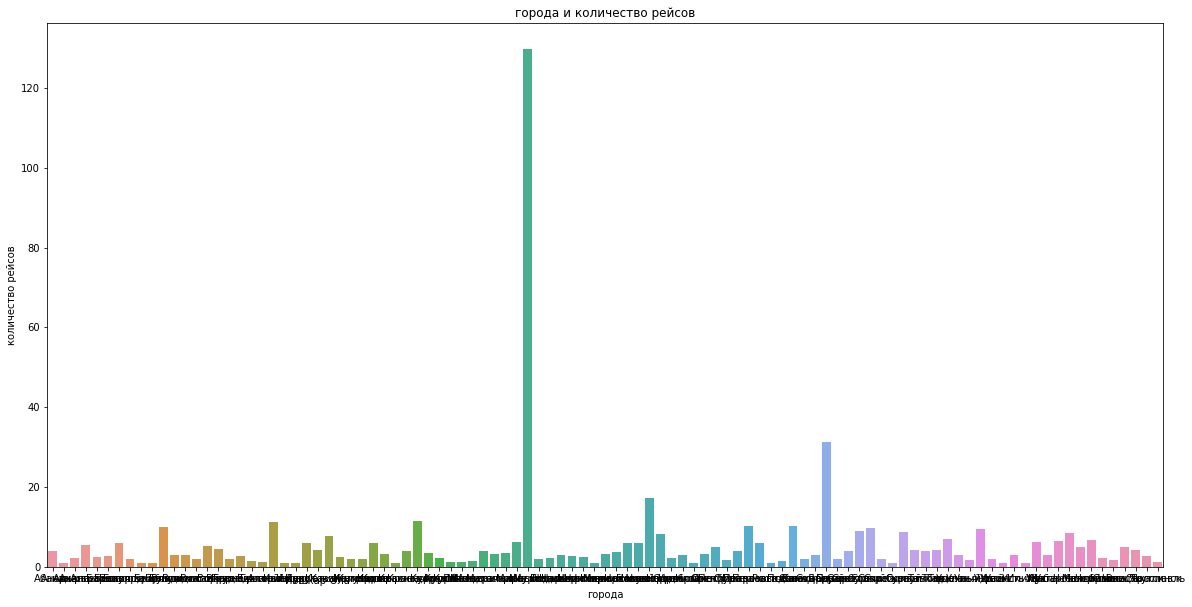

In [38]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x='city', y='average_flights', data=cityes.toPandas())
ax.set_title('города и количество рейсов')
ax.set_xlabel('города')
ax.set_ylabel('количество рейсов')

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Названия городов стоило повернуть на 90 градусов.

</div>


Как видим: больше всего выделяются два города, взглянем на них.

In [39]:
(cityes.toPandas()).loc[cityes.toPandas()['average_flights'] > 20]

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290


Text(0, 0.5, 'количество рейсов')

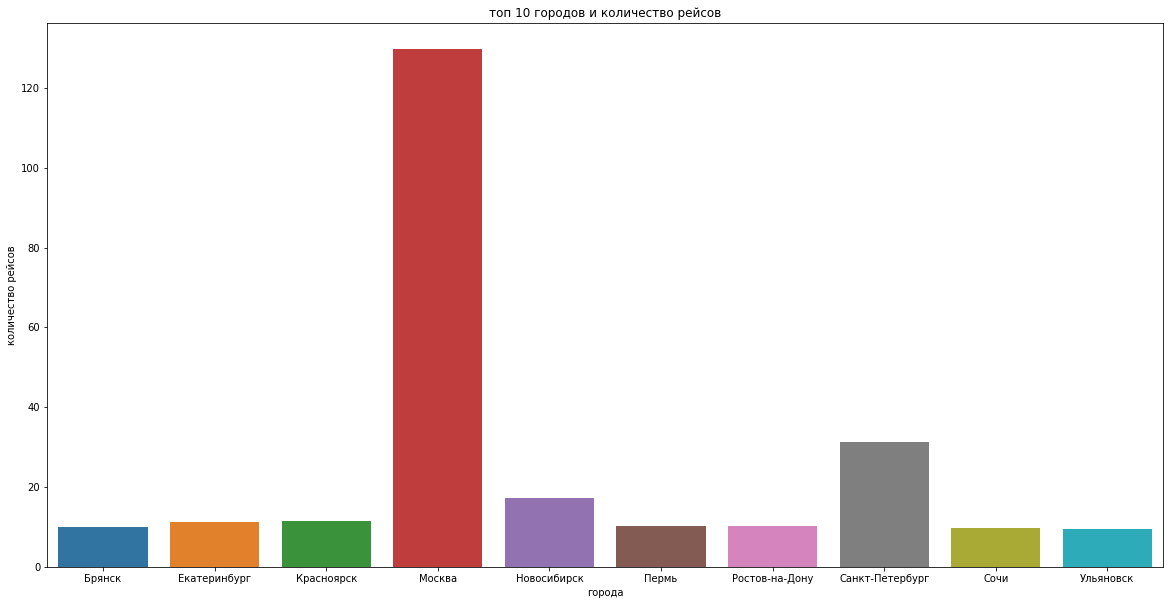

In [47]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x='city', y='average_flights', data=(cityes.toPandas()).loc[cityes.toPandas()['average_flights'] > 9.58])
ax.set_title('топ 10 городов и количество рейсов')
ax.set_xlabel('города')
ax.set_ylabel('количество рейсов')

Опять таки выделяются два города: Москва и СПБ.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличная визуализация и верные выводы.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также можно расширить выводы и порассуждать о причинно-следственной связи полученных результатов.

</div>


# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Файлы изучены
- [ ]  Типы данных проверены на корректность
- [ ]  Выбран топ-10 городов по количеству рейсов
- [ ]  Построен график «Модели самолётов и количество рейсов»
- [ ]  Построен график «Города и количество рейсов»
- [ ]  Построен график «Топ-10 городов и количество рейсов»
- [ ]  На каждом этапе написаны выводы
- [ ]  Написан общий вывод